In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
%%timeit
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample
from sklearn.cluster import KMeans
from sklearn.metrics import precision_score, recall_score, f1_score

#Reading the files
data1 = pd.read_csv('/content/drive/MyDrive/FML Assignment /training1.csv', sep=',')


data2 = pd.read_csv('/content/drive/MyDrive/FML Assignment /training2.csv', sep=',')

test_data = pd.read_csv('/content/drive/MyDrive/FML Assignment /test.csv', sep=',')
true_labels = pd.read_csv('/content/drive/MyDrive/FML Assignment /sample_valid_predictions.csv', sep=',')
#Concatenate the two DataFrames and remove duplicates
combined_data = pd.concat([data1, data2], ignore_index=True).drop_duplicates()

#target variable and confidence weights 
X = combined_data.drop(['label', 'confidence'], axis=1)  
y = combined_data['label']              
weights = combined_data['confidence']   

if X.shape[0] > 0:
#Handle missing values by filling them with the mean of the column
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)

#Feature selection using PCA
    pca = PCA(n_components=95)
    X_pca = pca.fit_transform(X_imputed)
#Apply clustering algorithm to the data
    n_clusters = 11
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_pca)

#Data normalization using robust scaling and min-max normalization
    scaler1 = RobustScaler()
    scaler2 = MinMaxScaler()
    X_pca = scaler1.fit_transform(X_pca)
    X_pca = scaler2.fit_transform(X_pca)

#Split the data 
    X_train, X_temp, y_train, y_temp = train_test_split(X_pca, y, test_size=0.4, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#Split the weights
    weights_train, weights_temp = train_test_split(weights, test_size=0.4, random_state=42)
    weights_val, weights_test = train_test_split(weights_temp, test_size=0.5, random_state=42)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample
from sklearn.metrics import precision_score, recall_score, f1_score


svm = SVC(kernel='rbf', C=100, gamma='scale', random_state=42)

#Define the hyperparameter grid to search over
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

grid_search = GridSearchCV(svm, param_grid, cv=5, n_jobs=-3)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
#Train the model using the training set, the best hyperparameters, and the sample weights
svm = SVC(kernel='rbf', C=best_params['C'], gamma='scale', random_state=42)
svm.fit(X_train, y_train, sample_weight=weights_train)


y_val_pred = svm.predict(X_val)


accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation accuracy: {accuracy}')

#Make predictions on the testing set
y_test_pred = svm.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Testing accuracy: {test_accuracy}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Validation accuracy: 0.6983333333333334
Testing accuracy: 0.695


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Validation accuracy: 0.6966666666666667
Testing accuracy: 0.6883333333333334


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Validation accuracy: 0.71
Testing accuracy: 0.6883333333333334


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Validation accuracy: 0.7033333333333334
Testing accuracy: 0.6883333333333334


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Validation accuracy: 0.7
Testing accuracy: 0.6983333333333334


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Validation accuracy: 0.7016666666666667
Testing accuracy: 0.6916666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Validation accuracy: 0.76
Testing accuracy: 0.7266666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Validation accuracy: 0.7516666666666667
Testing accuracy: 0.7366666666666667
45.7 s ± 401 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [40]:
def dataprocessing(data):
  vals=data.values
  scaler = MinMaxScaler(feature_range = (0,1))
  norm = scaler.fit_transform(vals)
  filler = SimpleImputer(strategy='mean')
  data_for_pca = filler.fit_transform(norm)
  PrincipleComponentAnalysis = PCA(10)
  pca_dt = PrincipleComponentAnalysis.fit_transform(data_for_pca) 
  return pca_dt

In [41]:
#Dependencies and Classifiers
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.decomposition import PCA
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import statistics
from sklearn.model_selection import learning_curve
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier


# Read the first file
training1 = pd.read_csv('/content/drive/MyDrive/FML Assignment /training1.csv', sep=',')

# Read the second file
training2 = pd.read_csv('/content/drive/MyDrive/FML Assignment /training2.csv', sep=',')

test_data = pd.read_csv('/content/drive/MyDrive/FML Assignment /test.csv', sep=',')

#Concat the datasets
arr = [training1,training2]
training3 = pd.concat(arr)
#get label
train_label = training3['label']

#Fill Nan for Testing
for name in test_data:
  test_data[name].fillna(test_data[name].mean(), inplace = True)


In [42]:
#Data Processing Function
def dataprocessing(data):
  vals=data.values
  scaler = MinMaxScaler(feature_range = (0,1))
  norm = scaler.fit_transform(vals)
  filler = SimpleImputer(strategy='mean')
  data_for_pca = filler.fit_transform(norm)
  PrincipleComponentAnalysis = PCA(10)
  pca_dt = PrincipleComponentAnalysis.fit_transform(data_for_pca) 
  return pca_dt

In [43]:
#Getting and removing values
data = list(training3.columns.values)
data.remove('label')
pro_data = training3[data]
train_label = training3['label']
train_data=dataprocessing(pro_data)

testing_data = dataprocessing(test_data)
len(testing_data)

1000

In [44]:
X_train, X_test, y_train, y_test = train_test_split(train_data, train_label, test_size=0.2, random_state=42)

In [45]:
LR = LogisticRegression()

Parameters = [
    {
    'penalty' : ['l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
    'max_iter' : [100,110,120],
    'dual':[True,False]
    }
]

#GridSearch
Cross_v = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=12)
grid_search  = GridSearchCV(estimator=LR, param_grid = Parameters, n_jobs=-1, cv=Cross_v, scoring='accuracy')
grid_result = grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
3600 fits failed out of a total of 10800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1800 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 59, in _check_solver
    raise ValueError(
ValueError

In [46]:
model=LogisticRegression(penalty='l2',C=0.08858667904100823,solver='liblinear',max_iter = 130,dual=True)
model.fit(X_train,y_train)

LogisticRegression(C=0.08858667904100823, dual=True, max_iter=130,
                   solver='liblinear')

In [47]:
acc_pred = model.predict(X_test)

In [48]:
log_acc = accuracy_score(y_test,acc_pred)
print("accuracy : ", accuracy_score(y_test,acc_pred))
print(confusion_matrix(y_test,acc_pred)) # Confusion matrix

accuracy :  0.7533333333333333
[[258  57]
 [ 91 194]]


In [49]:
LR_predictions = model.predict(testing_data)

In [50]:
lentrain =  70
clf = MLPClassifier(activation='relu',solver='sgd', hidden_layer_sizes=(15),batch_size=lentrain,learning_rate_init=0.01,nesterovs_momentum=False,momentum=0.6,max_iter=400)
clf.fit(X_train,y_train)

MLPClassifier(batch_size=70, hidden_layer_sizes=15, learning_rate_init=0.01,
              max_iter=400, momentum=0.6, nesterovs_momentum=False,
              solver='sgd')

In [51]:
mlp_acc_pred = clf.predict(X_test)

In [52]:
mlp_acc = accuracy_score(y_test,mlp_acc_pred)
print("accuracy : ", accuracy_score(y_test,mlp_acc_pred))
print(confusion_matrix(y_test,mlp_acc_pred)) # Confusion matrix
print('Process completed in %d epochs' % clf.n_iter_)

accuracy :  0.7683333333333333
[[251  64]
 [ 75 210]]
Process completed in 221 epochs


In [53]:
MLP_Predcitions = clf.predict(testing_data)
print(MLP_Predcitions)


[1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0.
 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0.
 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0.
 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0.
 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0.
 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0.
 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1.

In [55]:
import pandas as pd

MLP_Predcitions = clf.predict(testing_data)
print(MLP_Predcitions)


# Convert numpy array to DataFrame
MLP_Predictions_df = pd.DataFrame(MLP_Predcitions, columns=['predictions'])

# Write to CSV
MLP_Predictions_df.to_csv('/content/drive/MyDrive/FML Assignment /predictions.csv' , index=False)


[1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0.
 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0.
 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0.
 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0.
 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0.
 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0.
 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1.

In [18]:
Knn_Classifier = KNeighborsClassifier(n_neighbors=9)
Knn_Classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [19]:
KNN_Acc_Pred = Knn_Classifier.predict(X_test)

In [20]:
knn_acc = accuracy_score(y_test,KNN_Acc_Pred)
print(knn_acc)

0.7083333333333334


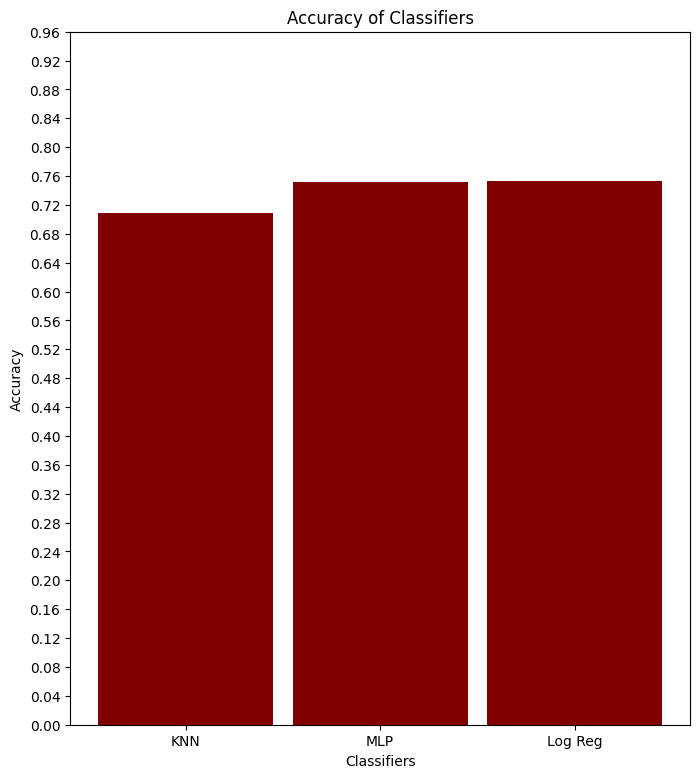

In [21]:
import numpy as np
import matplotlib.pyplot as plt
 
  
#  accuracies
data = {'KNN':knn_acc, 'MLP':mlp_acc, 'Log Reg':log_acc}

Classifier = list(data.keys())
Acc = list(data.values())
  
fig = plt.figure(figsize = (8, 9))
 
# creating the bar plot
plt.bar(Classifier, Acc , color ='maroon',
        width = 0.9)
plt.yticks(np.arange(0, 1, step=0.04))
plt.xlabel("Classifiers")
plt.ylabel("Accuracy")
plt.title("Accuracy of Classifiers")
plt.show()

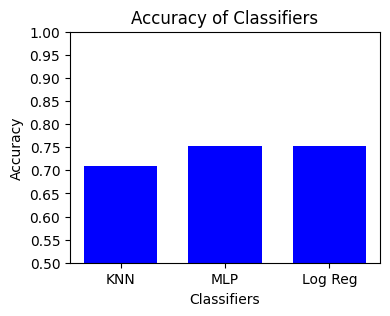

In [22]:
import numpy as np
import matplotlib.pyplot as plt
  
#accuracies
data = {'KNN':knn_acc, 'MLP':mlp_acc, 'Log Reg':log_acc}

Classifier = list(data.keys())
Acc = list(data.values())
  
fig = plt.figure(figsize = (4, 3))  #Here I changed the size to 6x6 becauses limited on space
 
#creating the bar plot
plt.bar(Classifier, Acc , color ='blue', width = 0.7)
plt.yticks(np.arange(0.5, 1.1, step=0.05))
plt.ylim([0.5, 1])   #This line sets the y-axis limits
plt.xlabel("Classifiers")
plt.ylabel("Accuracy")
plt.title("Accuracy of Classifiers")
plt.show()



In [23]:
import pandas as pd

#same data
data = {'KNN':knn_acc, 'MLP':mlp_acc, 'Log Reg':log_acc}

#Create a DataFrame from dictionary
df = pd.DataFrame(list(data.items()), columns=['Classifier', 'Accuracy'])

#Display the table
print(df)


  Classifier  Accuracy
0        KNN  0.708333
1        MLP  0.751667
2    Log Reg  0.753333


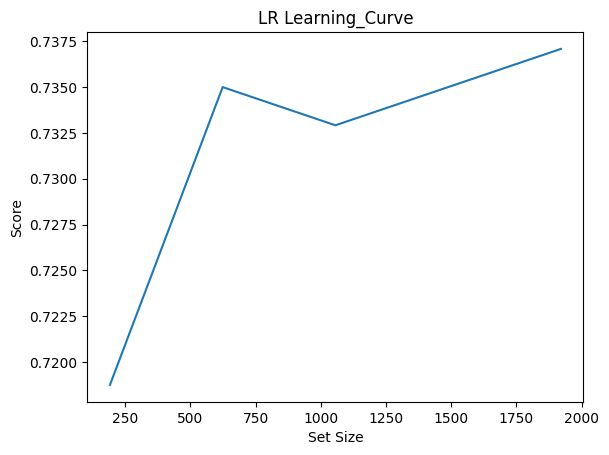

In [24]:
LR=LogisticRegression(penalty='l2',C=0.08858667904100823,solver='liblinear',max_iter = 110,dual=True)

train_sizes,train_scores, test_scores = learning_curve(LR, X_train, y_train, cv=5)
mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, mean)

plt.title("LR Learning_Curve")
plt.xlabel('Set Size')
plt.ylabel('Score')
plt.show()

cross validation analysis and acc

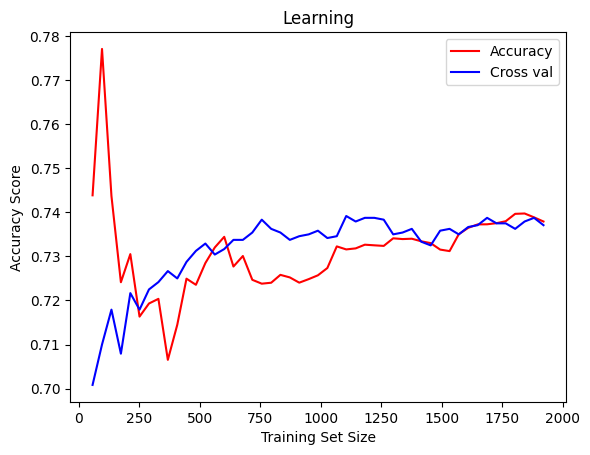

In [25]:
LR=LogisticRegression(penalty='l2',C=0.08858667904100823,solver='liblinear',max_iter = 130,dual=True)

#CV Folds to 5
training_size, training_scores, testing_scores = learning_curve(LR, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))


av_train = np.mean(training_scores, axis=1)
av_test = np.mean(testing_scores, axis=1)

  
plt.plot(training_size, av_train,color="r",  label="Accuracy")
plt.plot(training_size, av_test, color="b", label="Cross val")
  
#Drawing Graph
plt.title('Learning')
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.show()

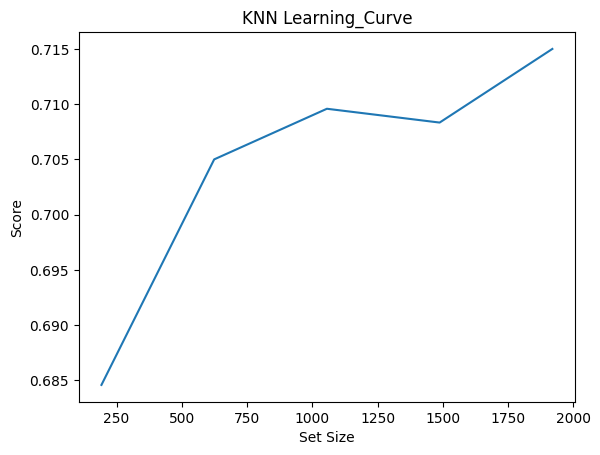

In [26]:
Knn_Classifier = KNeighborsClassifier(n_neighbors=11)

train_sizes,train_scores, test_scores = learning_curve(Knn_Classifier, X_train, y_train, cv=5)
mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, mean)

plt.title("KNN Learning_Curve")
plt.xlabel('Set Size')
plt.ylabel('Score')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

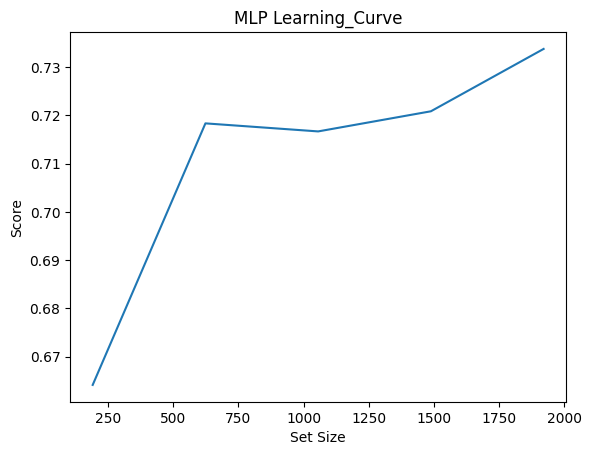

In [27]:
clf = MLPClassifier(activation='relu',solver='sgd', hidden_layer_sizes=(15),batch_size=lentrain,learning_rate_init=0.001,nesterovs_momentum=False,momentum=0.6,max_iter=400)
train_sizes,train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=5)
mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, mean)

plt.title("MLP Learning_Curve")
plt.xlabel('Set Size')
plt.ylabel('Score')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

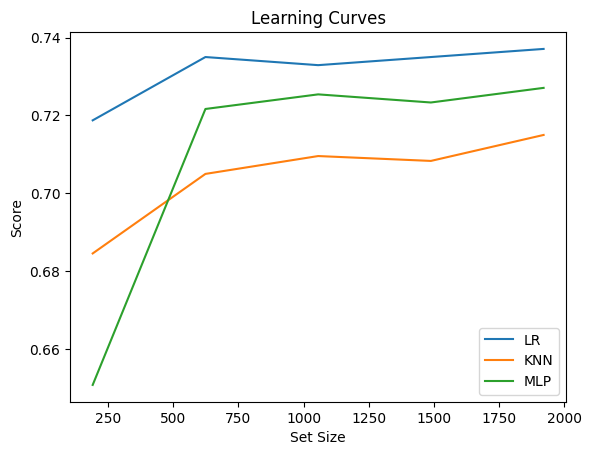

In [28]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import numpy as np

LR=LogisticRegression(penalty='l2',C=0.08858667904100823,solver='liblinear',max_iter = 110,dual=True)
train_sizes,train_scores, test_scores = learning_curve(LR, X_train, y_train, cv=5)
mean_lr = np.mean(test_scores, axis=1)
plt.plot(train_sizes, mean_lr, label="LR")

Knn_Classifier = KNeighborsClassifier(n_neighbors=11)
train_sizes,train_scores, test_scores = learning_curve(Knn_Classifier, X_train, y_train, cv=5)
mean_knn = np.mean(test_scores, axis=1)
plt.plot(train_sizes, mean_knn, label="KNN")

clf = MLPClassifier(activation='relu',solver='sgd', hidden_layer_sizes=(15),batch_size=lentrain,learning_rate_init=0.001,nesterovs_momentum=False,momentum=0.6,max_iter=400)
train_sizes,train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=5)
mean_mlp = np.mean(test_scores, axis=1)
plt.plot(train_sizes, mean_mlp, label="MLP")

plt.title("Learning Curves")
plt.xlabel('Set Size')
plt.ylabel('Score')
plt.legend()
plt.show()


<ipython-input-29-307385983b27>:22: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = cv_results.pivot(index='param_C', columns='param_gamma', values='mean_test_score')
<ipython-input-29-307385983b27>:22: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = cv_results.pivot(index='param_C', columns='param_gamma', values='mean_test_score')


<Axes: xlabel='param_gamma', ylabel='param_C'>

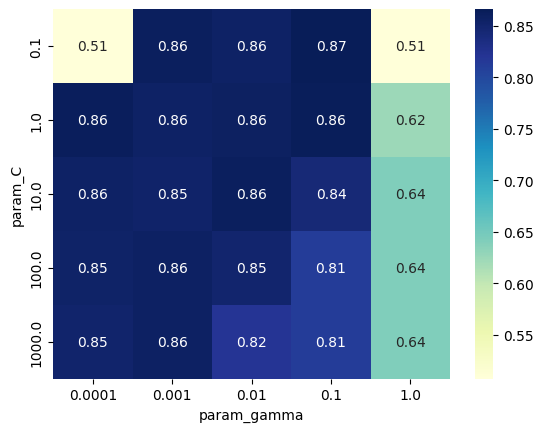

In [29]:
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
import seaborn as sns
import pandas as pd

#Generating a random classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the hyperparameter search space
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

grid_search = GridSearchCV(SVC(kernel='rbf', random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Extracting the results
cv_results = pd.DataFrame(grid_search.cv_results_)


heatmap_data = cv_results.pivot(index='param_C', columns='param_gamma', values='mean_test_score')


sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu")


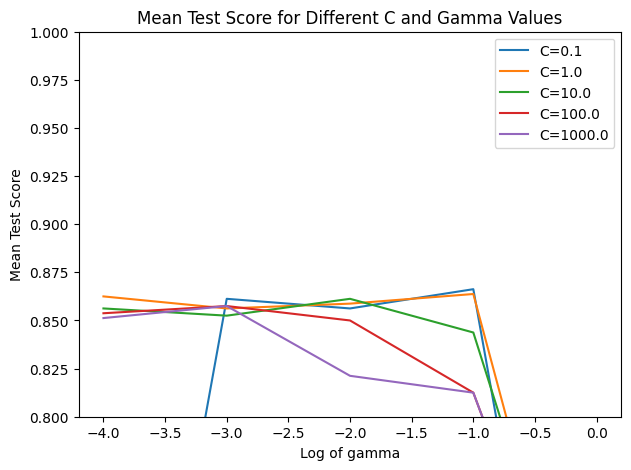

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Convert to float for computation
C_values = cv_results['param_C'].unique().astype('float64')
gamma_values = cv_results['param_gamma'].astype('float64')


unique_C_values = np.unique(C_values)

# Create a figure
plt.figure(figsize=(7, 5))



for C in unique_C_values:
   e
    mask = cv_results['param_C'].astype('float64') == C
   
    gamma_for_C = gamma_values[mask].to_numpy()
    scores_for_C = cv_results['mean_test_score'][mask].to_numpy()
    
    sort_indices = np.argsort(gamma_for_C)
  
    plt.plot(np.log10(gamma_for_C[sort_indices]), scores_for_C[sort_indices], label=f'C={C}')


plt.xlabel('Log of gamma')
plt.ylabel('Mean Test Score')
plt.legend()
plt.ylim(0.8, 1.0)
plt.title("Mean Test Score for Different C and Gamma Values")
plt.show()
